# HEART DISEASE ANALYSIS


In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv(r"C:\Users\sudha\Downloads\heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Understanding the data
- **age**
- **sex**
    - Value 0:Female
    - Value 1:Male
-**chest pain type**(4 values)
    - Value 0: typical angina
    - Value 1: atypical angina
    - Value 2: non-anginal pain
    - Value 3: asymptomatic
-**trestbps**: resting blood pressure in mg/dl
-**chol**: serum/cholestrol in mg/dl
-**fbs**: (fasting blood sugar>120 mg/dl)(1=true;0=false)
-**restecg**: resting electrocartiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of>0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
-**thalach**: maximum heart rate achieved
-**exang**: exercise induced angina (1=yes; 0=no)
-**oldpeak**: ST depression induced by exercise relative to rest
-**slope**: the slope of the peal exercise ST segment
    -  Value 1: upsloping
    -  Value 2: flat
    -  Value 3: downsloping
- **ca**: number of major vessels(0-3) colored by floursopy
- **thal**: 3=normal, 6=fixed defect, 7=reversible defect
- **target**: 0=less chance of heart attack, 1=more chance of heart attack
    

In [3]:
# No of rows and columns
data.shape

(1025, 14)

In [4]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
# Getting info about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
# Checking for duplicates

data.duplicated().any()


True

In [8]:
# Removing duplicates

data=data.drop_duplicates()
data.shape

(302, 14)

In [9]:
# Statistics about the data

data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:>

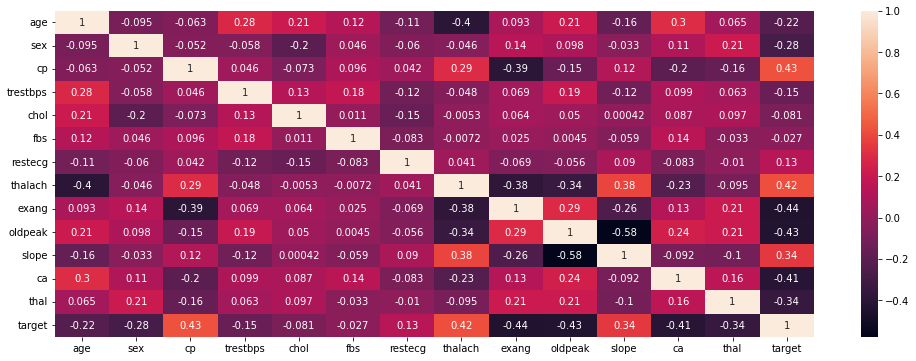

In [13]:
# Drawing the correlation matrix

plt.figure(figsize=(17,6))
sns.heatmap(data.corr(),annot=True)

In [14]:
# How many people have heart disease and how many don't

data['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

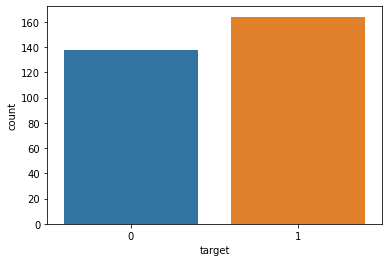

In [34]:
sns.countplot(x=data.target)

In [20]:
#No. of males and females

data['sex'].value_counts() #count of unique values

1    206
0     96
Name: sex, dtype: int64

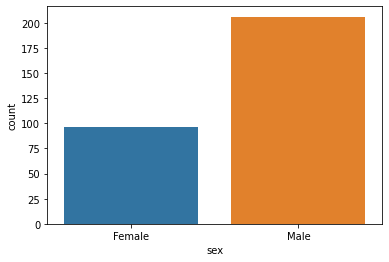

In [38]:
sns.countplot(x=data.sex)
plt.xticks([0,1],['Female','Male'])
plt.show()

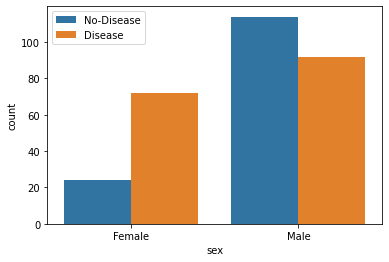

In [43]:
#Gender Distribution According to The Target Variable

sns.countplot(x='sex',hue='target',data=data)
plt.xticks([0,1],['Female','Male'])
plt.legend(['No-Disease','Disease'])
plt.show()

C:\Users\sudha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


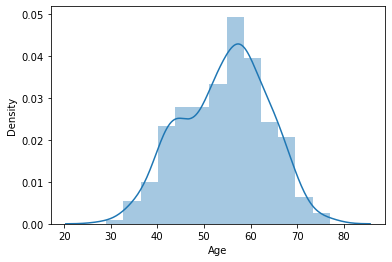

In [63]:
# Age Distribution In The Dataset

sns.distplot(data['age'])
plt.xlabel("Age")
plt.show()

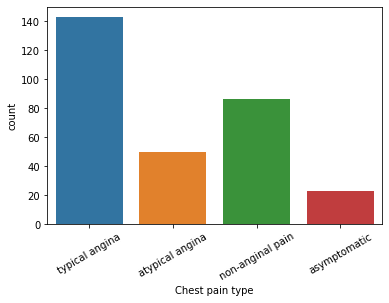

In [57]:
# Chest pain type

sns.countplot(x=data['cp'])
plt.xticks([0,1,2,3],['typical angina','atypical angina','non-anginal pain','asymptomatic'],rotation=30)
plt.xlabel("Chest pain type")
plt.show()

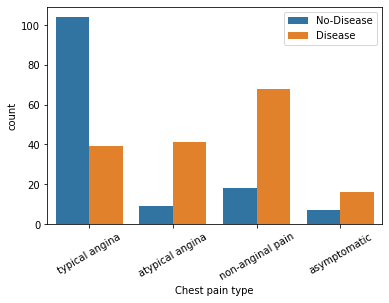

In [61]:
# Chest pain distribution as per Target Value

sns.countplot(x='cp',hue='target',data=data)
plt.xticks([0,1,2,3],['typical angina','atypical angina','non-anginal pain','asymptomatic'],rotation=30)
plt.xlabel("Chest pain type")
plt.legend(['No-Disease','Disease'])
plt.show()

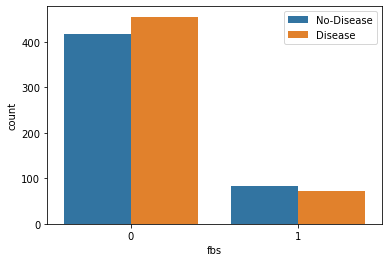

In [4]:
# Fasting Blood Sugar Distribution According To Target Variable

sns.countplot(x='fbs',hue='target',data=data)
plt.legend(['No-Disease','Disease'])
plt.xticks([0,1],)
plt.show()

In [ ]:
# Resting Blood Pressure Distribution

<AxesSubplot:>

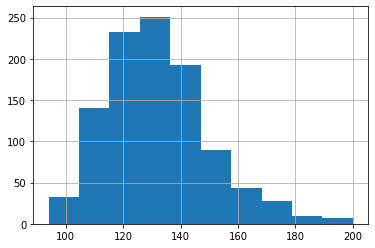

In [5]:
#data['trestbps'].hist()

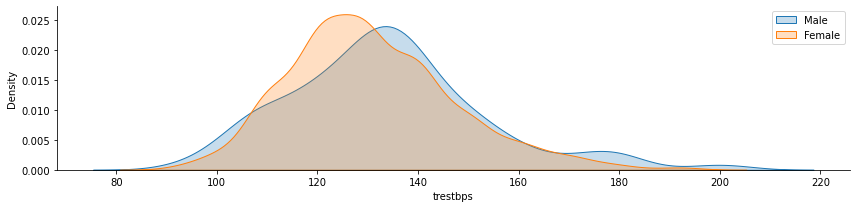

In [8]:
g=sns.FacetGrid(data,hue='sex',aspect=4)
g.map(sns.kdeplot,'trestbps',shade=True)
plt.legend(labels=['Male','Female'])

<AxesSubplot:>

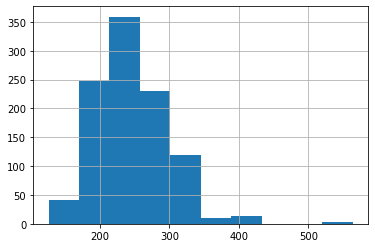

In [9]:
# Distribution of serum cholestrol
data['chol'].hist()

In [10]:
# Plot Continuous Variables

data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [13]:
cat_val=[]
cont_val=[]

In [14]:
for col in data.columns:
    if data[col].nunique()<=10:
        cat_val.append(col)
    else:
        cont_val.append(col)

In [15]:
cat_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [16]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

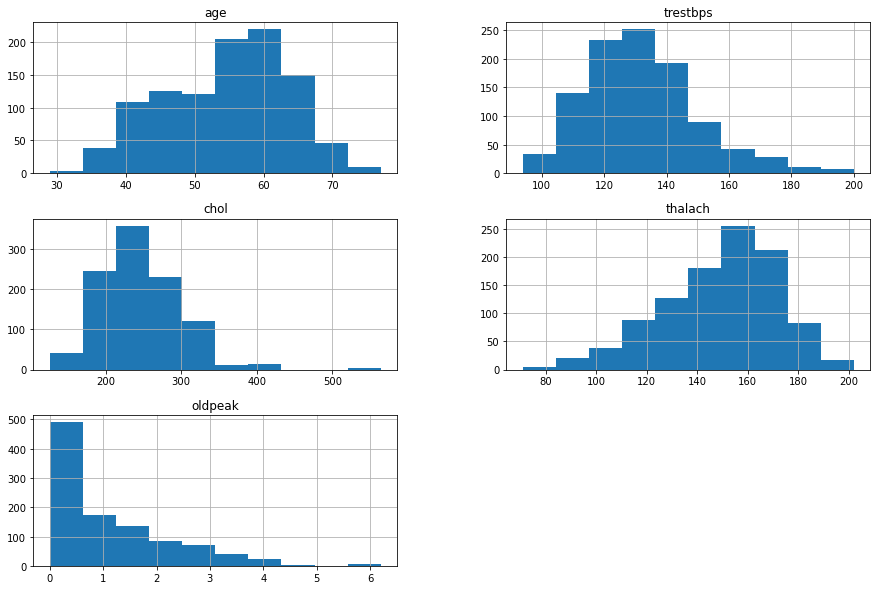

In [22]:
data.hist(cont_val,figsize=(15,10))
plt.show()